# 1. Define the Problem


## Problem Statement
The growth of online distribution has grown by 46% from 2014 to 2018. The hold has shifted from manual bookings to online travel agencies by almost 68% in 2018. The hospitality industry is facing issues in revenue generation due to ease of cancellations of the bookings made. Based on the data collected in 2018, almost 40% of the revenue is cancelled before arrival. This comes with the possibility of easy online bookings and their cancellations. 

## Goal
Our aim with this project is to help the hospitality industry generate the maximum revenue with the resources available to them based on the factors identified. Specifically, in this project, our goal is to:
- Predict the future possibility of cancellation using Predictive Analytis approach - Factors like period of stay, weather, holiday season and time of the year for the booking may play a crucial role in determining whether the booking will be productive or not. This will determine whether the booking made will be productive based on historical data.
- Descriptive analytics to further understand patterns, trends, and anomalies in data.
- Evaluate the performance of various models and select best two models for hyperparameters tuning and then use this best model to make hotel bookings cancellation predition.




# 2. Discover the Problem
This project is divided in 5 sections:

    1.0 Connection to MySQL database and loading and reading data

    2.0 Data Exploration
    
        2.1 The Data, Data Description & Preprocessing

        2.2 Removing Duplicate observations
    
        2.3 Assessing Missing Values
    
        2.4 Investigating the datasets
        
        2.5 EDA (Exploratory Data Analysis)


    3.0 Some Data Visualization
    
     
    4.0 Feature Engineering
        4.1 Re-encoding Some Features (Feature Engineering)
        4.2 Numerical Columns
                A. Correlation Matrix and Heat-map
                B. Recursive Feature Elimination
                C. Feature Importance (ExtraTreesClassifier())
        4.3 Categorical Columns
                A. Chi Square Test & Fisher Score
     
      
    5.0 Model Selection: Logitic Regression, Gradient Boosting and Random Forest
        
        5.1 Feature Importances
        
    6.0 Conclusion

### Import Libraries

In [279]:
" Common libraries " 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pymysql
from sqlalchemy import create_engine

## 1. Connect to the MySQL database

In [280]:
# MySQL credentials
user = 'root'
password = 'root'
host = 'localhost'  # or '127.0.0.1'
database = 'hotel_bookings'

# Create an SQLAlchemy engine
engine_with_db = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}')

# SQL query
query = """SELECT * FROM hotel_bookings;"""

# Pandas to execute the SQL query and load data into a DataFrame
hotel_data = pd.read_sql(query, engine_with_db)

# Preview the first few rows of the data
display(hotel_data.head())

# Optionally close the engine connection when done
# engine.dispose()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## 2 Data Exploration
### 2.1 Data, Data Description & Preprocessing

In [281]:
""" 
    - load the data into a Pandas dataframe
    - display first 5 rows from dataframe 
    - information for the datasets
    
"""
# hotel_data = pd.read_csv("hotel_bookings.csv")
print("No. of records (rows) Hotel Bookings Demand Datasets: ", hotel_data.shape[0])
print("No. of features (columns) Hotel Bookings Demand Datasets: ", hotel_data.shape[1])
# print("\nColumns names of the hotel booking datasets: \n", hotel_data.columns.tolist())

print("\nFirst 5 records of the datasets: ")
display(hotel_data.head())

print("\n\nHotel Bookings Demand Datasets Information: ")
display(hotel_data.info())

No. of records (rows) Hotel Bookings Demand Datasets:  119390
No. of features (columns) Hotel Bookings Demand Datasets:  32

First 5 records of the datasets: 


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03




Hotel Bookings Demand Datasets Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                         

None

In [282]:
# SQL
query = """ select count(*) as "No. of Rows" 
            from hotel_bookings; 
        """
df = pd.read_sql(query, engine_with_db)
display(df)

query = """ select count(*) as "No. of Columns" 
            from information_schema.columns 
            where table_name = 'hotel_bookings' and table_schema = 'hotel_bookings';
        """
df = pd.read_sql(query, engine_with_db)
display(df)

query = """ describe hotel_bookings; 
        """
df = pd.read_sql(query, engine_with_db)
# display(df)

,No. of Rows
0,119390


,No. of Columns
0,32


### 2.2 Removing Duplicate observations

In [283]:
"""
    - find and remove duplicate rows in hotel_data
"""

# check the number of duplicated rows
# no. of rows is identical to other row or rows
print("No. of duplicate rows: ", hotel_data.duplicated(keep='first').sum()) 

# Check for this duplicate rows as a dataframe
# display(hotel_data.loc[hotel_data.duplicated(keep='first')])

No. of duplicate rows:  31994


In [284]:
### Remove the duplicate rows #####
hotel_data = hotel_data.drop_duplicates(keep='first')
# check the dataset dimension
print("\nDimension of hotel_data after removing duplicates: ", hotel_data.shape)


Dimension of hotel_data after removing duplicates:  (87396, 32)


### 2.3 Assessing Missing Values

In [285]:
""" Checking for Null, NA, NaN values """
missing_data = hotel_data.isnull().sum(axis=0)
print("No. of missing data in each columns:\n", missing_data)

columns_with_missing_value = hotel_data.columns[hotel_data.isnull().any()].tolist()
print("\n Columns name which has missing value: ", columns_with_missing_value)

columns_with_nan = hotel_data.columns[hotel_data.isna().any()].tolist()
print("\n Columns name which has NaN: ", columns_with_nan)

## verifying
print("\n Missing Values are equals to NaN: ", columns_with_missing_value == columns_with_nan)

No. of missing data in each columns:
 hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
co

### 2.4 Investigating the Data

#### A. Analysis of Target Variable 'is_cancelled'

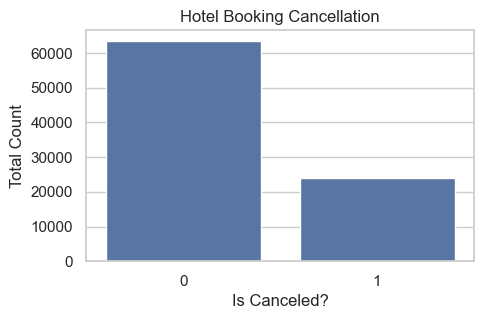

In [286]:
## is_cancelled
plt.figure(figsize=(5, 3))
sns.set(style="whitegrid")
ax = sns.countplot(x="is_canceled", data=hotel_data)
plt.title('Hotel Booking Cancellation')
plt.xlabel('Is Canceled?')
plt.ylabel('Total Count')
plt.show()

In [287]:
# SQL
query = """ select is_canceled 
            from hotel_bookings; 
        """
df = pd.read_sql(query, engine_with_db)
display(df.head())

,is_canceled
0,0
1,0
2,0
3,0
4,0


##### A.1 Worse Case Baseline Accuracy

In [288]:
booking_cancel = (hotel_data['is_canceled'] == 1).sum()
print("No. of booking canceled: ", booking_cancel)
not_booking_cancel = (hotel_data['is_canceled'] == 0).sum()
print("No. of booking not canceled: ", not_booking_cancel)
total_booking = booking_cancel + not_booking_cancel
print("Total count: ", total_booking)
print("% Worse Case Base line Accuracy based on majority class: ", round((not_booking_cancel/total_booking) * 100, 2), "%" )

No. of booking canceled:  24025
No. of booking not canceled:  63371
Total count:  87396
% Worse Case Base line Accuracy based on majority class:  72.51 %


#### B. Analysis of columns with missing value:  ['children', 'country', 'agent', 'company']

In [289]:
missing_col = hotel_data[['children', 'country', 'agent', 'company']]

B1. Company

In [290]:
"""
    - Analysis of 'company" Feature
"""
# display(missing_col['company'].value_counts())
print("Missing values in 'company' column: ", missing_col['company'].isnull().sum())

Missing values in 'company' column:  82137


- The `company` columns has lots of `nan` because this column has the ID of the company that that made the booking or responsible for paying the booking.  So, there might be many case where the booking is not made by the Company.
- So we can replace `nan` with `0`

In [291]:
# Filling missing value with 0 
hotel_data["company"] = hotel_data["company"].fillna(0)

B2. Agent

In [292]:
"""
    - Analysis of "agent" Feature
"""
# display(missing_col['agent'].value_counts())
print("Missing values in 'agent' column: ", missing_col['agent'].isnull().sum())

Missing values in 'agent' column:  12193


- The `agent` columns has lots of `nan` because this column has the ID ID of the travel agency that made the booking.  So, there might be many case where the booking is not made by the agent.
- So we can replace `nan` with `0`

In [293]:
# Filling missing value with 0 
hotel_data["agent"] = hotel_data["agent"].fillna(0)

B3. Children

Missing values in 'children' column:  4
value 	 count of children 
 children
0.0     79028
1.0      4695
2.0      3593
3.0        75
NaN         4
10.0        1
Name: count, dtype: int64


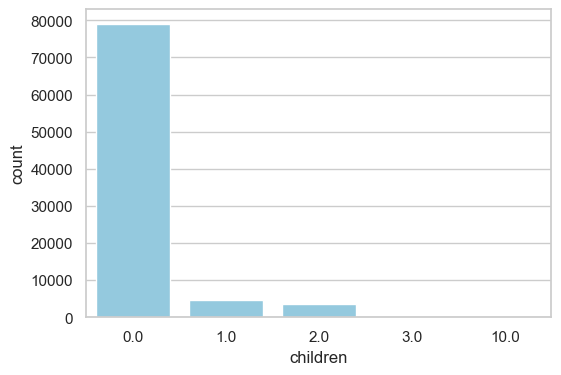

In [294]:
"""
    - Analysis of "children" Feature
"""
print("Missing values in 'children' column: ", missing_col['children'].isnull().sum())

### children
print("value \t count of children \n", missing_col['children'].value_counts(dropna=False))
plt.figure(figsize=(6,4))
sns.countplot(x="children", data=missing_col, color='skyblue')
plt.show()

- There are only `4` missing values in `children` column.
- These missing `nan` values can be repalced with `0` since `0` is the maximum times appeared in this `children` column.

In [295]:
# Replace NaN with 0 child
hotel_data['children'] = hotel_data['children'].replace(np.nan, 0)

In [296]:
# Replace 10 children with 1 child
hotel_data['children'] = hotel_data['children'].replace(to_replace = 10, value = 0) 

In [297]:
print("value count of children :", hotel_data['children'].value_counts(dropna=False))
# display(new_hotel_data[new_hotel_data.children.isnull()])

value count of children : children
0.0    79033
1.0     4695
2.0     3593
3.0       75
Name: count, dtype: int64


B4. Country

In [298]:
print("Missing values in 'country' column: ", missing_col['country'].isnull().sum())

Missing values in 'country' column:  452


#### C. Removing ['country'] feature

In [299]:
hotel_data = hotel_data.drop(['country'], axis=1)

Final check for missing values

In [300]:
columns_with_missing_value = hotel_data.columns[hotel_data.isnull().any()].tolist()
print("\n Columns name which has missing value: ", columns_with_missing_value)


 Columns name which has missing value:  []


### 2.5 Exploratory Data Analysis
#### 2.5.1 Descriptive Statistics: 
- Measure of Central Tendency:
- Measure of Dispersion:

**Summarizing numerical and categorical columns seperately**


In [301]:
# print(" Columns names and their types: \n", hotel_data.dtypes)
# num_int_type = hotel_data.select_dtypes(include = [np.number]).columns.tolist()
num_int_type = hotel_data.select_dtypes(include='int64').columns.tolist()
# print("\nNumeric-Integer Types columns name: \n", num_int_type)

num_float_type = hotel_data.select_dtypes(include='float64').columns.tolist()
# print("\nNumeric-Float Types columns name: \n", num_float_type)

## Summary of numerical features
print("\nSummary of Statistics for numerical columns: ")
num_type = num_int_type + num_float_type
display(hotel_data[num_type].describe().T)
# display(hotel_data.describe(include = [np.number]).T)


Summary of Statistics for numerical columns: 


,count,mean,std,min,25%,50%,75%,max
is_canceled,87396.0,0.274898,0.446466,0.00,0.0,0.0,1.0,1.0
lead_time,87396.0,79.891368,86.052325,0.00,11.0,49.0,125.0,737.0
arrival_date_year,87396.0,2016.210296,0.686102,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,87396.0,26.838334,13.674572,1.00,16.0,27.0,37.0,53.0
arrival_date_day_of_month,87396.0,15.815541,8.835146,1.00,8.0,16.0,23.0,31.0
stays_in_weekend_nights,87396.0,1.005263,1.031921,0.00,0.0,1.0,2.0,19.0
stays_in_week_nights,87396.0,2.625395,2.053584,0.00,1.0,2.0,4.0,50.0
adults,87396.0,1.875795,0.626500,0.00,2.0,2.0,2.0,55.0
babies,87396.0,0.010824,0.113597,0.00,0.0,0.0,0.0,10.0
is_repeated_guest,87396.0,0.039075,0.193775,0.00,0.0,0.0,0.0,1.0


**Summary of categorical features**

In [302]:
cat_object_type = hotel_data.select_dtypes(include='object').columns.tolist()
# print("\n\nCategorical Types columns name: \n", cat_object_type)
print("\nSummary of Statistics for categorical columns: ")
# display(hotel_data[cat_object_type].describe().T)
display(hotel_data.describe(include = ['O']).T)


Summary of Statistics for categorical columns: 


,count,unique,top,freq
hotel,87396,2,City Hotel,53428
arrival_date_month,87396,12,August,11257
meal,87396,5,BB,67978
market_segment,87396,8,Online TA,51618
distribution_channel,87396,5,TA/TO,69141
reserved_room_type,87396,10,A,56552
assigned_room_type,87396,12,A,46313
deposit_type,87396,3,No Deposit,86251
customer_type,87396,4,Transient,71986
reservation_status,87396,3,Check-Out,63371


**Note** Conclusion of statistics summary
1. 'arrival_data_year' need to be encoded from 2015, 2016, and 2017 are big number and will impack the model performance
2. 'stays_in_weekend_nights'  need to be encoded since 1st qaurtile is 0, 2nd quartile is 1, 3rd quartile is 2 while max value is 19
3. 'stays_in_week_nights' need to be encoded since 1st qaurtile is 0, 2nd quartile is 2, 3rd quartile is 3 while max value is 50 with further analysis
4. 'babies' features has issue Max is 10 while other quartiles are 0
5. 

#### 2.5.2 Univariate Analysis

##### Functions used to Plot

In [303]:
# Functions used in this project
""" Visualize the Numerical Features """
def visualize_num_feature(hotel_data):
    plt.figure(figsize = (10, 4))
    plt.subplot(1,2,1)
    sns.boxplot(hotel_data)
    plt.subplot(1,2,2)
    sns.histplot(hotel_data, bins=20, kde=True)
    plt.show()
 
""" Use IQR rule to identify potential outliers"""
def stat_summary(hotel_data):
    stat =  hotel_data.describe()
    print(stat)
    IQR = stat['75%'] - stat['25%']
    upper = stat['75%'] + 1.5 * IQR
    lower = stat['25%'] - 1.5 * IQR
    print('The upper and lower bounds for suspected outliers are {} and {}' .format(upper, lower))    

- 2.5.2.1 Lead Time

Visualize lead_time Feature


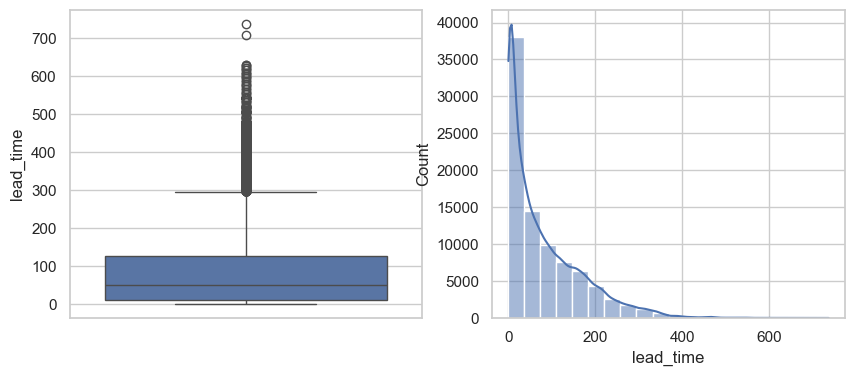

count    87396.000000
mean        79.891368
std         86.052325
min          0.000000
25%         11.000000
50%         49.000000
75%        125.000000
max        737.000000
Name: lead_time, dtype: float64
The upper and lower bounds for suspected outliers are 296.0 and -160.0


In [304]:
### lead_time
print('Visualize lead_time Feature')
visualize_num_feature(hotel_data.lead_time)
stat_summary(hotel_data.lead_time) 

In [305]:
## "lead_time" - Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
# The upper and lower bounds for suspected outliers are 296.0 and -160.0
# lower outlier -160.0 does not make sense - I will explain why we are getting this
# I am just choosing
remain_lead_time = hotel_data["lead_time"] < 300 ## less than 300 days is more reasonable logically and statiscally
new_hotel_data = hotel_data[remain_lead_time]
print(hotel_data.shape)

(87396, 31)


##### Analysis between lead time and target variable "is_cacncelled" with hotel type

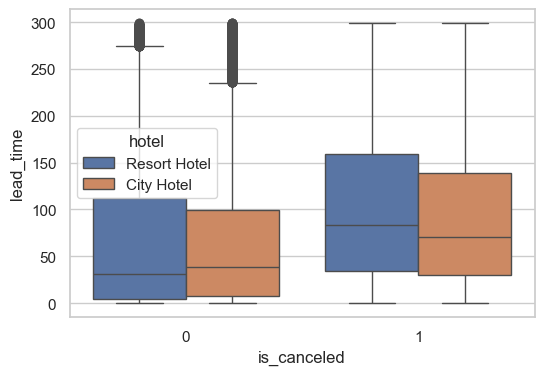

In [306]:
plt.figure(figsize=(6,4))
sns.boxplot(x = 'is_canceled', y = 'lead_time', data = new_hotel_data, hue='hotel')
plt.show()

- 2.5.2.2 'stays_in_weekend_nights' and 'stays_in_weeknights'

Both features need to be encoded

Visulaize 'stays_in_weekend_nights' Feature


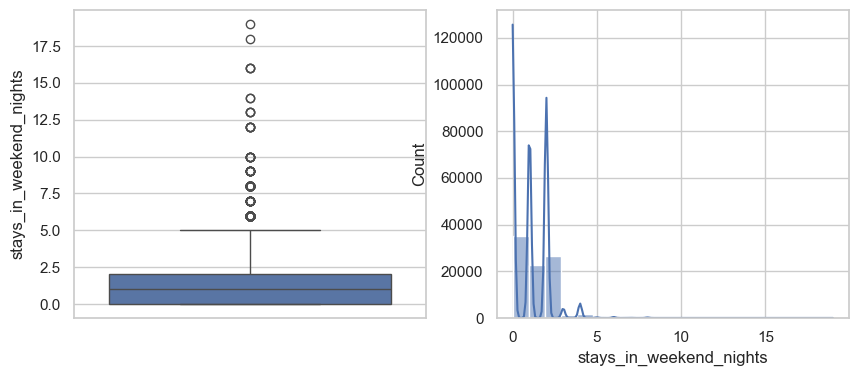

count    87396.000000
mean         1.005263
std          1.031921
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         19.000000
Name: stays_in_weekend_nights, dtype: float64
The upper and lower bounds for suspected outliers are 5.0 and -3.0
Visulaize 'stays_in_week_nights' Feature


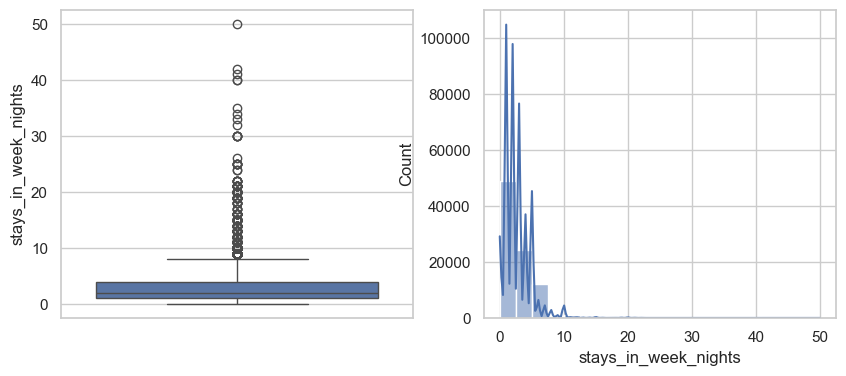

count    87396.000000
mean         2.625395
std          2.053584
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         50.000000
Name: stays_in_week_nights, dtype: float64
The upper and lower bounds for suspected outliers are 8.5 and -3.5


In [307]:
print("Visulaize 'stays_in_weekend_nights' Feature")
visualize_num_feature(hotel_data['stays_in_weekend_nights'])
stat_summary(hotel_data['stays_in_weekend_nights']) 

############################################################################
print("Visulaize 'stays_in_week_nights' Feature")
visualize_num_feature(hotel_data['stays_in_week_nights'])
stat_summary(hotel_data['stays_in_week_nights']) 

2.5.2.3 Adults

'adults' feature need to be encoded

Visulaize 'Adults' Feature


adults
2     64497
1     16503
3      5935
0       385
4        60
26        5
5         2
27        2
20        2
40        1
55        1
50        1
6         1
10        1
Name: count, dtype: int64

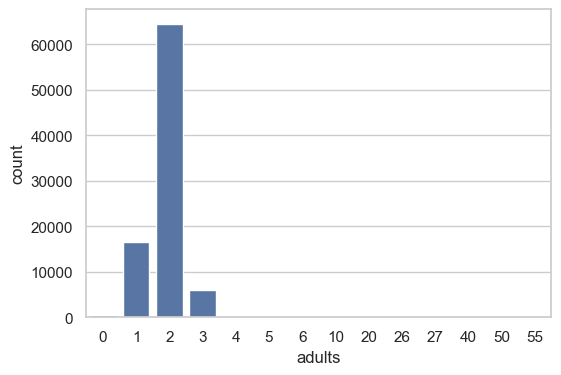

In [308]:
print("Visulaize 'Adults' Feature")
plt.figure(figsize=(6,4))
sns.countplot(x="adults", data=hotel_data)
display(hotel_data['adults'].value_counts(dropna=False))

2.5.2.4 Babies

'babies' feature need to be encoded

Visulaize 'Babies' Feature
count    87396.000000
mean         0.010824
std          0.113597
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: babies, dtype: float64
The upper and lower bounds for suspected outliers are 0.0 and 0.0


babies
0     86482
1       897
2        15
10        1
9         1
Name: count, dtype: int64

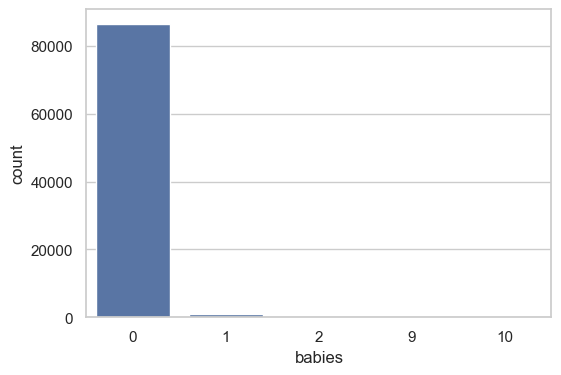

In [309]:
print("Visulaize 'Babies' Feature")
plt.figure(figsize=(6,4))
sns.countplot(x="babies", data=hotel_data)
stat_summary(hotel_data['babies']) 
display(hotel_data['babies'].value_counts(dropna=False))

2.5.2.5
- 'is_repeated_guest
- 'previous_cancellations', 
- 'previous_bookings_not_canceled', 
- 'booking_changes'

In [310]:
hotel_data['is_repeated_guest'].value_counts(dropna=False)

is_repeated_guest
0    83981
1     3415
Name: count, dtype: int64

In [311]:
hotel_data['previous_cancellations'].value_counts(dropna=False)

previous_cancellations
0     85711
1      1407
2       112
3        61
4        30
11       27
5        19
6        17
13        4
25        2
24        2
14        1
26        1
19        1
21        1
Name: count, dtype: int64

2.5.2.6 'days_in_waiting_list' and 'adr'

Visulaize adr Feature


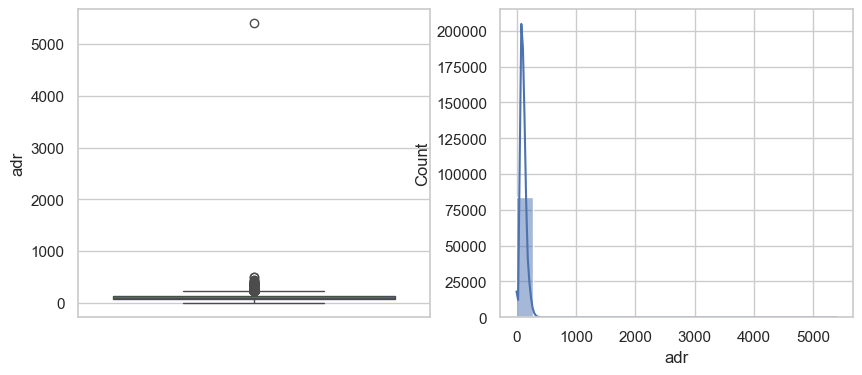

count    85078.000000
mean       106.664777
std         55.233281
min         -6.380000
25%         72.250000
50%         98.870000
75%        134.915000
max       5400.000000
Name: adr, dtype: float64
The upper and lower bounds for suspected outliers are 228.91250000000005 and -21.74750000000003


'\nAverage Daily Rate as defined by dividing the sum of all \nlodging transactions by the total number of staying nights\n\n'

In [312]:
### adr
print('Visulaize adr Feature')
visualize_num_feature(new_hotel_data['adr'])
stat_summary(new_hotel_data['adr']) 

"""
Average Daily Rate as defined by dividing the sum of all 
lodging transactions by the total number of staying nights

"""


In [313]:
## "adr"
remain_adr = new_hotel_data['adr'] < 300
new_hotel_data = new_hotel_data[remain_adr]
print(new_hotel_data.shape)

(84809, 31)


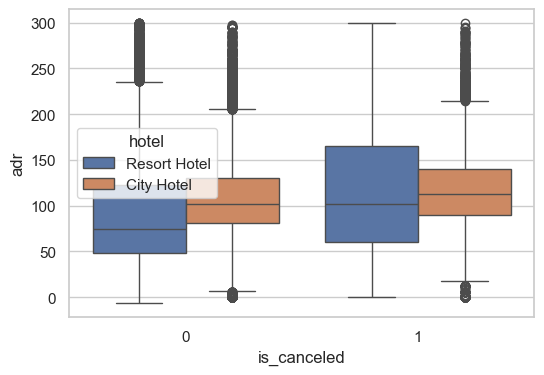

In [314]:
plt.figure(figsize=(6,4))
sns.boxplot(x = 'is_canceled', y = 'adr', data = new_hotel_data, hue='hotel')
plt.show()

2.5.2.7 'reservation_status'

In [315]:
hotel_data['reservation_status'].value_counts(dropna=False)

reservation_status
Check-Out    63371
Canceled     23011
No-Show       1014
Name: count, dtype: int64

#### 2.5.3 Bivariate Analysis 

**arrival_date_month vs is_canceled**

arrival_date_month,April,August,December,February,January,July,June,March,May,November,October,September
is_canceled,,,,,,,,,,,,
0,5499,7634,3753,4683,3655,6859,5411,5683,5913,3941,5292,5048
1,2409,3623,1378,1415,1038,3198,2354,1830,2442,1054,1642,1642


<Axes: xlabel='is_canceled'>

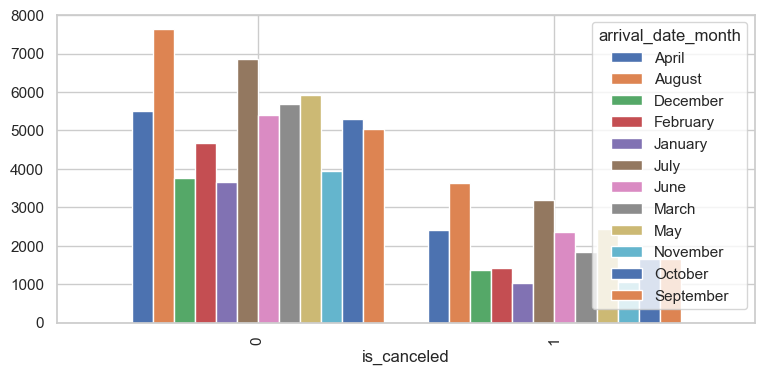

In [316]:
## arrival_date_month vs is_canceled
table_date_month = pd.crosstab(index=hotel_data["is_canceled"], 
                                columns=hotel_data["arrival_date_month"])
display(table_date_month )

table_date_month.plot(kind="bar", 
                 figsize=(9,4),
                 stacked=False,
                 width=0.85)

**adults vs is_canceled**

adults,0,1,2,3,4,5,6,10,20,26,27,40,50,55
is_canceled,,,,,,,,,,,,,,
0,288,13294,45836,3907,46,0,0,0,0,0,0,0,0,0
1,97,3209,18661,2028,14,2,1,1,2,5,2,1,1,1


<Axes: xlabel='is_canceled'>

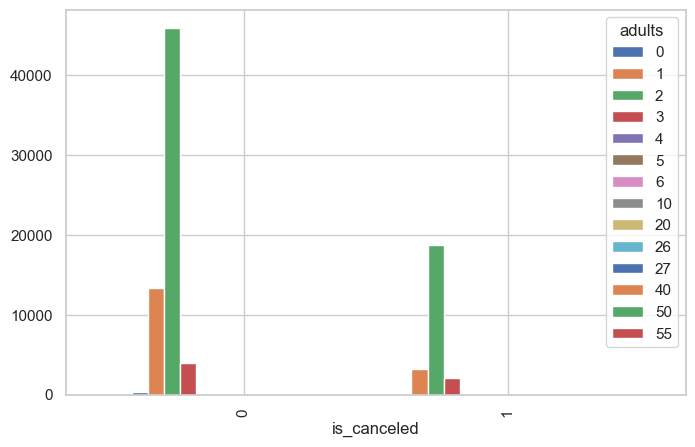

In [317]:
## adults vs is_canceled
table_adults = pd.crosstab(index=hotel_data["is_canceled"], 
                            columns=hotel_data["adults"])
display(table_adults)

table_adults.plot(kind="bar", 
                 figsize=(8,5),
                 stacked=False,
                 width=0.85)

**count of members checked out from the two hotels**

In [318]:
# count of members checked out from the two hotels
table_hotel = pd.crosstab(hotel_data['hotel'], hotel_data['is_canceled'], 
            margins=True, margins_name="Total")
display(table_hotel)

is_canceled,0,1,Total
hotel,,,
City Hotel,37379,16049,53428
Resort Hotel,25992,7976,33968
Total,63371,24025,87396


**reservation_status vs is_canceled**

reservation_status,Canceled,Check-Out,No-Show
is_canceled,,,
0,0,63371,0
1,23011,0,1014


<Axes: xlabel='is_canceled'>

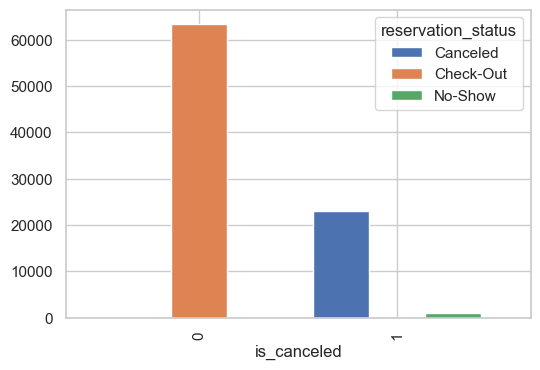

In [319]:
## reservation_status vs is_canceled

table_reservation_status = pd.crosstab(index=hotel_data["is_canceled"], 
                                        columns=hotel_data["reservation_status"])
display(table_reservation_status )

table_reservation_status.plot(kind="bar", 
                 figsize=(6,4),
                 stacked=False,
                 width=0.85)

**customer_type vs. is_canceled**

In [320]:
## Customer Type Feature
table_customer_type = pd.crosstab(index=hotel_data["is_canceled"], 
                                  columns=hotel_data["customer_type"])
display(table_customer_type)

customer_type,Contract,Group,Transient,Transient-Party
is_canceled,,,,
0,2627,490,50314,9940
1,512,54,21672,1787


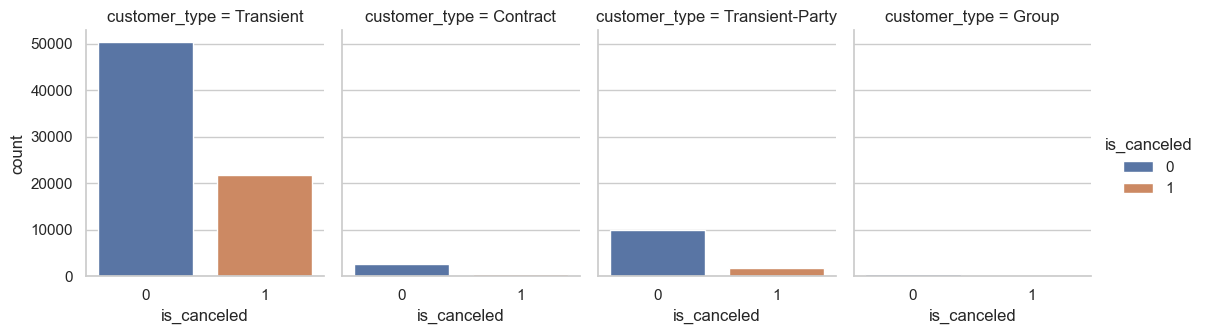

In [321]:
sns.catplot(data=hotel_data, 
            col="customer_type", 
            x="is_canceled", 
            kind="count", 
            height=3.5, 
            aspect=.8, 
            hue="is_canceled")


**market_segment vs. is_canceled**

market_segment,Aviation,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA,Undefined
is_canceled,,,,,,,,
0,182,614,3702,10067,3607,11826,33373,0
1,45,88,510,1737,1335,2063,18245,2


<Axes: xlabel='is_canceled'>

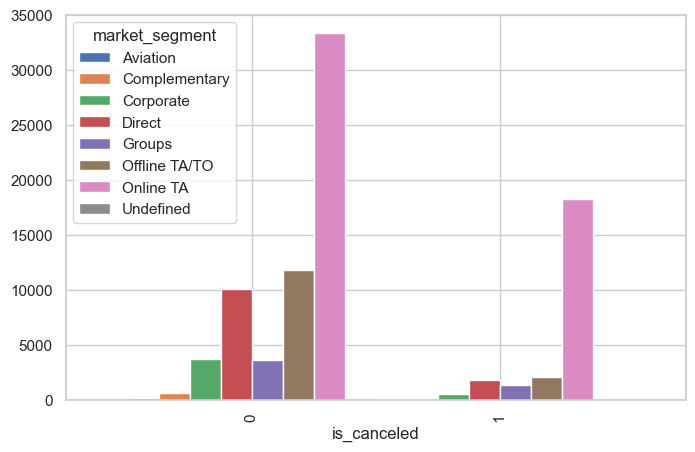

In [322]:
# Market segment
table_market_segment = pd.crosstab(index=hotel_data["is_canceled"], 
                                        columns=hotel_data["market_segment"])

display(table_market_segment)
table_market_segment.plot(kind="bar", 
                 figsize=(8,5),
                 stacked=False,
                         width=1)

**customer_type vs. stays_in_week_nights**

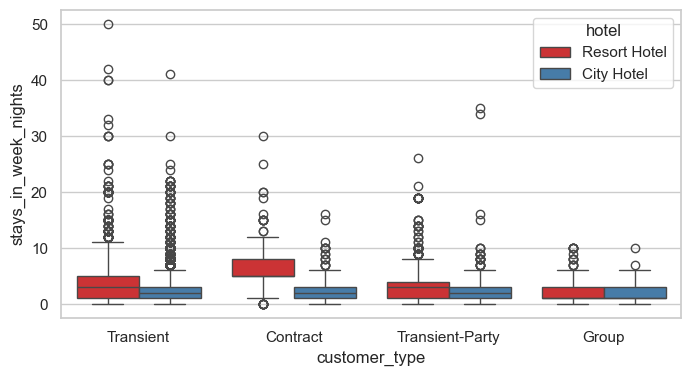

In [323]:
plt.figure(figsize = (8, 4))
sns.boxplot(x = "customer_type", y = "stays_in_week_nights", data = hotel_data, hue = "hotel", palette = 'Set1');

### 3.0 Some more Data Visualization

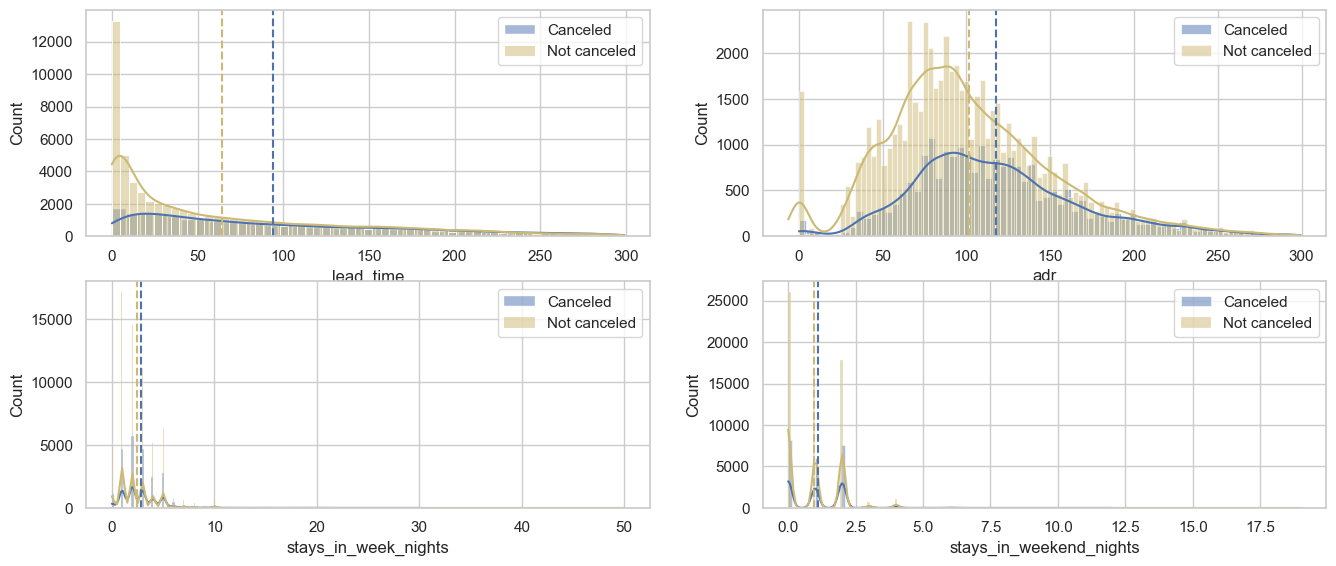

In [324]:
# Subsetting by is_canceled!
canceled = hotel_data["is_canceled"] == 1
not_canceled = hotel_data["is_canceled"] == 0

# Creating the plots
features = ['lead_time', 'adr', 'stays_in_week_nights', 'stays_in_weekend_nights']
labels = ['Canceled', 'Not canceled']

def creating_plots(features, labels):
    plt.figure(figsize=(16,10))
    for feature in features:
        plt.subplot(3, 2, features.index(feature)+1)
        sns.histplot(new_hotel_data[feature][canceled], label=labels[0], color="b", kde=True)
        sns.histplot(new_hotel_data[feature][not_canceled], label=labels[1], color="y", kde=True)
        plt.axvline(new_hotel_data[feature][canceled].mean(), linestyle = '--', color="b")
        plt.axvline(new_hotel_data[feature][not_canceled].mean(), linestyle = '--', color="y")
        plt.legend()

creating_plots(features, labels)

In [325]:
data = hotel_data.copy()

### 3.6 Saving dataframe for Feature Engineering

In [326]:
folder_path = r"C:\Users\yrobi\Desktop\Robin World\Data Science - Machine Learning Prep\Robin - Data Science\1-Hotel Bookings Demand - Kaggle\Hotel-Booking-Demand\data"
data.to_csv(f'{folder_path}\\hotel_after_eda.csv', index=False)